In [97]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [98]:
from __future__ import print_function #for compatibility beteen python2 and python3

# all other needed modules will be imported as they are needed. 
# I will leave them in the cell where they become relevant BUT  
# PEP8 standards require to move them at the top cell, 
# so you must move your imports in this cell for the homework

# solution 1: download from the portal 


In [99]:
!curl https://data.cityofnewyork.us/resource/waf7-5gvc.csv > WaterConsump.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1324    0  1324    0     0   5536      0 --:--:-- --:--:-- --:--:--  5539


In [100]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sg5718/PUIdata


In [101]:
#test if the data is there
!ls $PUIDATA

HW 2  WaterConsump.csv


In [102]:
!mv WaterConsump.csv $PUIDATA

In [103]:
!ls $PUIDATA

HW 2  WaterConsump.csv


## read in the data with pandas

In [104]:
#read in the data with pandas
import pandas as pd
wcny = pd.read_csv("%s/WaterConsump.csv"%os.getenv("PUIDATA"))

In [105]:
#print the fist 8 lines out
wcny.head(8)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986


In [106]:
#print the last 3 lines out
wcny.tail(3)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
36,7506166.0,1368.5,182,1993
37,8041649.0,1135.6,141,2002
38,7570458.0,1357.7,179,1994


In [107]:
#look at the columns available, those are the variables
wcny.columns

Index([u'new_york_city_population', u'nyc_consumption_million_gallons_per_day',
       u'per_capita_gallons_per_person_per_day', u'year'],
      dtype='object')

In [108]:
wcny.rename(columns = {'year':'Year', 
               'new_york_city_population':'New York City Population', 
               'nyc_consumption_million_gallons_per_day': 'NYC Consumption(Million gallons per day)'}, inplace=True)

In [109]:
#count how many rows, those are the data points
wcny.size

156

In [110]:
#select 2 columns only for plotting
wcny_2c = wcny[['Year','New York City Population']]

In [111]:
wcny_2c.head()

,Year,New York City Population
0,1979,7102100.0
1,1980,7071639.0
2,1981,7089241.0
3,1982,7109105.0
4,1983,7181224.0


## plot the data

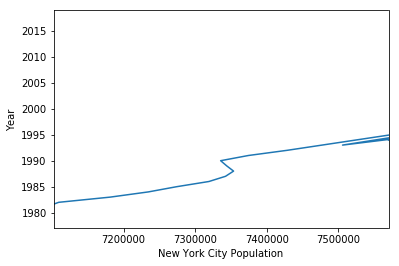

In [112]:
wcny1 = wcny_2c.plot(x="New York City Population", y="Year", legend=None)
wcny1.set_ylabel("Year")

In [113]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [114]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


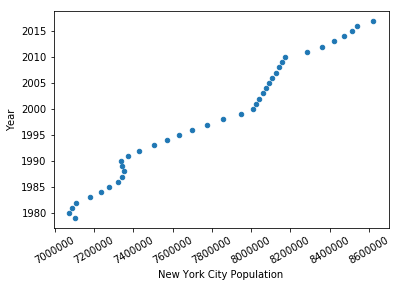

In [115]:
wcny_2c.plot(x="New York City Population", y="Year", kind='scatter', rot=30)
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

Figure 1: During the period between 1980 and 2015, population in New York city kept increasing steadily.

In [116]:
wcny_2c_new = wcny[['New York City Population', 'NYC Consumption(Million gallons per day)']]

In [117]:
wcny_2c_new.head()

,New York City Population,NYC Consumption(Million gallons per day)
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0


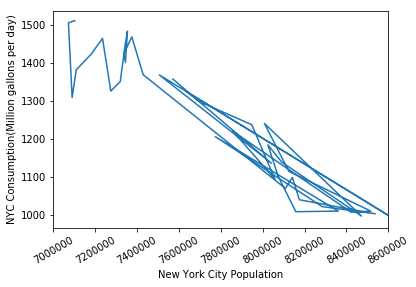

In [118]:
wcny2 = wcny_2c_new.plot(x="New York City Population", y="NYC Consumption(Million gallons per day)", xlim=(7000000,8600000), legend=None, rot=30)
wcny2.set_ylabel("NYC Consumption(Million gallons per day)")

In [119]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


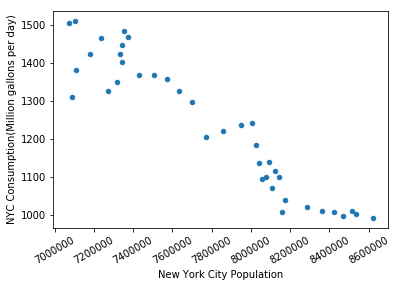

In [120]:
wcny_2c_new.plot(y="NYC Consumption(Million gallons per day)", x="New York City Population", kind='scatter',rot = 30);

Figure 2: There presents an overall nagative relationship between population and water comsumption.

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [121]:
url = "https://data.cityofnewyork.us/resource/waf7-5gvc.json"

In [122]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [123]:
# print it out
df.head(3)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981


In [124]:
#now select a date and 2 variables
wcny_3c = df[['year', 'new_york_city_population', 'nyc_consumption_million_gallons_per_day']]

for consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [125]:
wcny_3c.rename(columns = {'year':'Year', 
               'new_york_city_population':'New York City Population', 
               'nyc_consumption_million_gallons_per_day': 'NYC Consumption(Million gallons per day)'}, inplace=True)

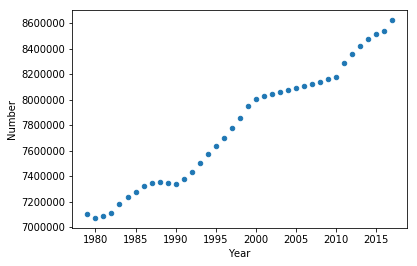

In [126]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = wcny_3c.plot(x='Year', y='New York City Population', kind="scatter");
ax.set_ylabel("Number");

Figure 3: During the period between 1980 and 2015, population in New York city kept increasing steadily.

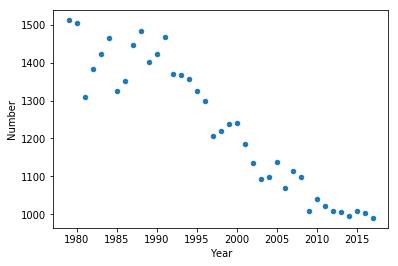

In [127]:
#plot the other columns
ax = wcny_3c.plot(x='Year', y='NYC Consumption(Million gallons per day)', kind="scatter")
ax.set_ylabel("Number");

Figure 4: During the period between 1980 and 2017, water comsumption in New York city decreased.